#### Кафедра дискретной математики МФТИ

#### Курс математической статистики

Игашов Илья, 593 групппа

#  Задание №7

Сгенерируйте выборку $X_1,\dots,X_{100}$ из распределения $P_{\theta}$ в теоретических задачах 1, 3, 4 и 5. В задачах 1, 3 и 4 возьмите $\theta=1$, в задаче 5 возьмите $(\theta, \lambda) = (10, 1)$. Для уровня доверия $\alpha = 0.95$ для всех $n\leq100$ постройте доверительный интервал (или интервалы, если их несколько), определенный в теоретической задаче. Изобразите их на графиках в координатах $(n, \theta)$, используя matplotlib.pyplot.fill_between. Если типов доверительных интервалов несколько, то какой из них лучше? 

Для $n = 10$ и $n = 100$ оцените вероятность попадания истинного значения $\theta$ в интервал (в каждой задаче для каждого интервала). Для этого сгенерируйте достаточно много выборок (предложите, сколько нужно выборок), постройте по каждой из них интервалы и определите, сколько раз в интервалы попадает истинное значение $\theta$. Таким способом будет построена бернуллиевская выборка, по ней оцените вероятность.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Задача 1.
Доверительные интервалы уровня $\alpha$:

a) $\left(\frac{\bar{X}}{\frac{1}{2} + \frac{1}{\sqrt{12n(1-\alpha)}}}, \frac{\bar{X}}{\frac{1}{2} - \frac{1}{\sqrt{12n(1-\alpha)}}}\right)$

b) $\left(0, \frac{X_{(1)}}{1 -  \sqrt[n]{\alpha}} \right)$

c) $\left(X_{(n)}, \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}} \right)$

In [2]:
from scipy.stats import uniform

theta = 1
alpha = 0.95
N = 100

In [3]:
# Генерируем выборку и считаем доверительные интервалы.
sample = uniform.rvs(0, theta, size=N)

# a)
interval_1 = np.array([
        [
            np.mean(sample[:n + 1]) / ((0.5 + 1 / (12 * (n + 1) * (1 - alpha)) ** (0.5))),
            np.mean(sample[:n + 1]) / ((0.5 - 1 / (12 * (n + 1) * (1 - alpha)) ** (0.5)))
        ]
    for n in range(N)])

# b)
interval_2 = np.array([
        [
            0,
            np.min(sample[:n + 1]) / (1 - alpha ** (1 / (n + 1)))
        ]
    for n in range(N)])

# c)
interval_3 = np.array([
        [
            np.max(sample[:n + 1]),
            np.max(sample[:n + 1]) / ((1 - alpha) ** (1 / (n + 1)))
        ]
    for n in range(N)])

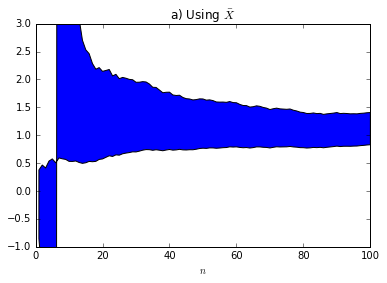

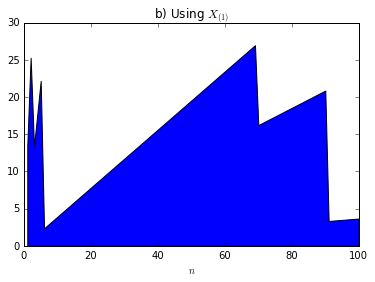

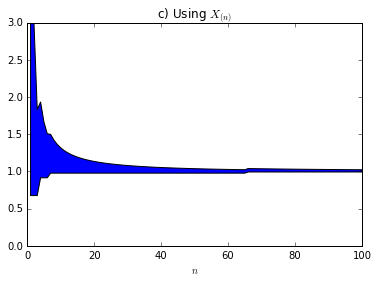

In [4]:
# Строим графики интервалов.
# a)
plt.figure()
plt.fill_between(np.linspace(1,N,N), interval_1[:,0], interval_1[:,1])
plt.ylim(-1, 3)
plt.title(r'a) Using $\bar{X}$')
plt.xlabel(r'$n$')
plt.show()

# b)
plt.figure()
plt.fill_between(np.linspace(1,N,N), interval_2[:,0], interval_2[:,1])
plt.title(r'b) Using $X_{(1)}$')
plt.xlabel(r'$n$')
plt.show()

# c)
plt.figure()
plt.fill_between(np.linspace(1,N,N), interval_3[:,0], interval_3[:,1])
plt.ylim(0, 3)
plt.title(r'c) Using $X_{(n)}$')
plt.xlabel(r'$n$')
plt.show()

In [5]:
# Оценим вероятность попадания истинного значения theta в интервал по схеме Бернулли
for N in [10, 100]: # для двух размеров выборки
    for K in [100, 1000, 10000, 100000]: # попробуем разное число экспериментов
        # Генерируем K выборок размера N
        samples = np.array([uniform.rvs(0, theta, size=N) for k in range(K)])
        
        # Считаем интервалы для каждой из K выборок
        intervals_1 = np.array([
                [
                    np.mean(samples[k]) / (0.5 + (12 * N * (1 - alpha)) ** (-0.5)),
                    np.mean(samples[k]) / (0.5 - (12 * N * (1 - alpha)) ** (-0.5))
                ] for k in range(K)])
        
        intervals_2 = np.array([
                [
                    0,
                    np.min(samples[k]) / (1 - alpha ** (1 / N))
                ] for k in range(K)])
        
        intervals_3 = np.array([
                [
                    np.max(samples[k]),
                    np.max(samples[k]) / ((1 - alpha) ** (1 / N))
                ] for k in range(K)])

        # Смотрим, сколько раз в интервалы попадает истинное значение theta.
        # Строим бернуллиевские выборки и оцениваем по ним вероятность попадания theta в интервал.
        bern_1 = np.array([1 if intervals_1[k,0] <= theta <= intervals_1[k,1] else 0 for k in range(K)])
        bern_2 = np.array([1 if intervals_2[k,0] <= theta <= intervals_2[k,1] else 0 for k in range(K)])
        bern_3 = np.array([1 if intervals_3[k,0] <= theta <= intervals_3[k,1] else 0 for k in range(K)])
        print('Sample size: %3s.' % N, 'Number of experiments:', K)
        print('a)', np.count_nonzero(bern_1) / len(bern_1))
        print('b)', np.count_nonzero(bern_2) / len(bern_2))
        print('c)', np.count_nonzero(bern_3) / len(bern_3))

Sample size:  10. Number of experiments: 100
a) 1.0
b) 0.94
c) 0.92
Sample size:  10. Number of experiments: 1000
a) 1.0
b) 0.966
c) 0.945
Sample size:  10. Number of experiments: 10000
a) 1.0
b) 0.9467
c) 0.9455
Sample size:  10. Number of experiments: 100000
a) 1.0
b) 0.95166
c) 0.94976
Sample size: 100. Number of experiments: 100
a) 1.0
b) 0.95
c) 0.95
Sample size: 100. Number of experiments: 1000
a) 1.0
b) 0.962
c) 0.951
Sample size: 100. Number of experiments: 10000
a) 1.0
b) 0.9491
c) 0.9526
Sample size: 100. Number of experiments: 100000
a) 0.99995
b) 0.95124
c) 0.95034


### Вывод: 

Вероятность попадания $\theta$ в первый интервал составляет 1, а значит точным он не является. По графику видно, что, по сравнению со вторым интервалом, первый гораздо уже, а значит, он является более информативным.

Вероятность попадания $\theta$ во второй интервал составила 0,95 (это видно из последнего результата: при увеличении числа экспериментов вероятность все более близка к значению 0,95). Этот доверительный интервал является точным для уровня доверия $\alpha=0,95$. Однако из графика видно, что он достаточно широкий (в сравнении с остальными).

Вероятность попадания $\theta$ в третий интервал также составила 0,95. Этот интервал тоже точный для $\alpha=0,95$. Плюс ко всему, он самый узкий из всех, а значит, наиболее полезен: диапазон значений параметра, удовлетворяющий этому интервалу меньше, чем у остальных.

### Задача 3.

Асимптотический доверительный интервал уровня $\alpha$:

$\left(\hat{\mu} - \frac{\pi}{2}\frac{u_{\frac{1 + \alpha}{2}}}{\sqrt{n}}, \hat{\mu} + \frac{\pi}{2}\frac{u_{\frac{1 + \alpha}{2}}}{\sqrt{n}}\right)$, где $u_{\frac{1 + \alpha}{2}} - \frac{1 + \alpha}{2}$- квантиль стандартного нормального распределения.


In [6]:
from scipy.stats import cauchy
from math import pi

theta = 1
alpha = 0.95
N = 100
u = 1.959964 # значение взято из таблицы http://stu.sernam.ru/book_stat2.php?id=170

In [7]:
# Генерируем выборку и считаем доверительные интервалы.
sample = cauchy.rvs(0, theta, size=N)
interval = np.array([
        [
            np.median(sample[:n + 1]) - pi / 2 * u / (n + 1) ** 0.5,
            np.median(sample[:n + 1]) + pi / 2 * u / (n + 1) ** 0.5
        ]
    for n in range(N)])

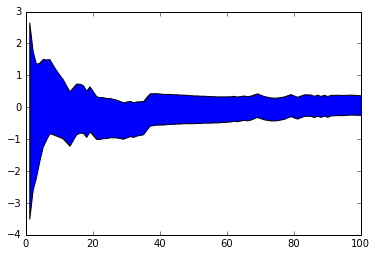

In [8]:
# Строим график интервала.
plt.figure()
plt.fill_between(np.linspace(1,N,N), interval[:,0], interval[:,1])
plt.show()

In [9]:
# Оценим вероятность попадания истинного значения theta в интервал по схеме Бернулли
for N in [10, 100]: # для двух размеров выборки
    for K in [100, 1000, 10000, 100000]: # попробуем разное число экспериментов
        # Генерируем K выборок размера N
        samples = np.array([cauchy.rvs(theta, size=N) for k in range(K)])
        intervals = np.array([
                [
                    np.median(samples[k]) - pi / 2 * u / N ** 0.5,
                    np.median(samples[k]) + pi / 2 * u / N ** 0.5
                ] for k in range(K)])
        
        # Смотрим, сколько раз в интервалы попадает истинное значение theta.
        # Строим бернуллиевские выборки и оцениваем по ним вероятность попадания theta в интервал.
        bern = np.array([1 if intervals[k,0] <= theta <= intervals[k,1] else 0 for k in range(K)])
        print('Sample size: %3s.' % N, 'Number of experiments:', K)
        print(np.count_nonzero(bern) / len(bern))

Sample size:  10. Number of experiments: 100
0.9
Sample size:  10. Number of experiments: 1000
0.918
Sample size:  10. Number of experiments: 10000
0.912
Sample size:  10. Number of experiments: 100000
0.91421
Sample size: 100. Number of experiments: 100
0.98
Sample size: 100. Number of experiments: 1000
0.958
Sample size: 100. Number of experiments: 10000
0.9451
Sample size: 100. Number of experiments: 100000
0.94821


 ### Вывод:
 
 Указанный выше интервал является точным асимптотическим доверительным интервалом уровня $\alpha=0,95$ для параметра $\theta$. График показывает, что при увеличении размера выборки интервал стабилизируется, заключая в себя истинное значение параметра, то есть он действительно является асимптотическим ДИ. Интервал является точным, так как вероятность попадания $\theta$ в него равна 0,95: для $N=100$ (достаточно большая выборка) при росте числа экспериментов оценка вероятности приближается к 0,95. На выборке размера 10 это не видно, поскольку интервал асимптотический и вероятность стремится к $\alpha$ при $N\to\infty$, то есть для небольших  $N$ вероятнось может существенно отличаться от $\alpha$. 

### Задача 4.

Асимптотический доверительный интервал уровня $\alpha$:

$\left(\bar{X} - u_{\frac{1 + \alpha}{2}}\sqrt{\frac{\bar{X}}{n}}, \bar{X} + u_{\frac{1 + \alpha}{2}}\sqrt{\frac{\bar{X}}{n}} \right),$ где $u_{\frac{1 + \alpha}{2}} - \frac{1 + \alpha}{2}$- квантиль стандартного нормального распределения.

In [10]:
from scipy.stats import poisson

theta = 1
N = 100
u = 1.959964

In [11]:
# Генерируем выборку и считаем доверительные интервалы.
sample = poisson.rvs(theta, size=N)
interval = np.array([
        [
            np.mean(sample[:n + 1]) - u * (np.mean(sample[:n + 1]) / (n + 1)) ** 0.5,
            np.mean(sample[:n + 1]) + u * (np.mean(sample[:n + 1]) / (n + 1)) ** 0.5  
        ] for n in range(N)])

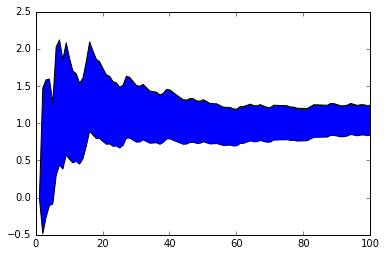

In [12]:
# Строим график интервала.
plt.figure()
plt.fill_between(np.linspace(1,N,N), interval[:,0], interval[:,1])
plt.show()

In [13]:
# Оценим вероятность попадания истинного значения theta в интервал по схеме Бернулли
for N in [10, 100]: # для двух размеров выборки
    for K in [100, 1000, 10000, 100000]: # попробуем разное число экспериментов
        # Генерируем K выборок размера N
        samples = np.array([poisson.rvs(theta, size=N) for k in range(K)])
        intervals = np.array([
                [
                    np.mean(samples[k]) - u * (np.mean(samples[k]) / N) ** 0.5,
                    np.mean(samples[k]) + u * (np.mean(samples[k]) / N) ** 0.5 
                ] for k in range(K)])
        
        # Смотрим, сколько раз в интервалы попадает истинное значение theta.
        # Строим бернуллиевские выборки и оцениваем по ним вероятность попадания theta в интервал.
        bern = np.array([1 if intervals[k,0] <= theta <= intervals[k,1] else 0 for k in range(K)])
        print('Sample size: %3s.' % N, 'Number of experiments:', K)
        print(np.count_nonzero(bern) / len(bern))

Sample size:  10. Number of experiments: 100
0.94
Sample size:  10. Number of experiments: 1000
0.934
Sample size:  10. Number of experiments: 10000
0.9242
Sample size:  10. Number of experiments: 100000
0.92717
Sample size: 100. Number of experiments: 100
0.92
Sample size: 100. Number of experiments: 1000
0.938
Sample size: 100. Number of experiments: 10000
0.9429
Sample size: 100. Number of experiments: 100000
0.94616


### Вывод:
 
 Указанный выше интервал является точным асимптотическим доверительным интервалом уровня $\alpha=0,95$ для параметра $\theta$. График показывает, что при увеличении размера выборки интервал стабилизируется, заключая в себя истинное значение параметра, то есть он действительно является асимптотическим ДИ. Интервал является точным, так как вероятность попадания $\theta$ в него равна 0,95: для $N=100$ (достаточно большая выборка) при росте числа экспериментов оценка вероятности приближается к 0,95. На выборке размера 10 это не видно, поскольку интервал асимптотический и вероятность стремится к $\alpha$ при $N\to\infty$, то есть для небольших  $N$ вероятнось может существенно отличаться от $\alpha$. 

### Задача 5.

Асимптотический доверительный интервал уровня $\alpha$:

$\left(\frac{\bar{X}}{\lambda} - u_{\frac{1 + \alpha}{2}}\frac{\bar{X}}{\sqrt{n\lambda}}, \frac{\bar{X}}{\lambda} + u_{\frac{1 + \alpha}{2}}\frac{\bar{X}}{\sqrt{n\lambda}} \right),$ где $u_{\frac{1 + \alpha}{2}} - \frac{1 + \alpha}{2}$- квантиль стандартного нормального распределения.

In [14]:
from scipy.stats import gamma

theta = 10
lam = 1
N = 100
u = 1.959964

In [21]:
# Генерируем выборку и считаем доверительные интервалы.
sample = gamma.rvs(theta, lam, size=N)
interval = np.array([
        [
            np.mean(sample[:n + 1]) / lam - u * np.mean(sample[:n + 1]) / (lam * (n + 1)) ** 0.5,
            np.mean(sample[:n + 1]) / lam + u * np.mean(sample[:n + 1]) / (lam * (n + 1)) ** 0.5  
        ] for n in range(N)])

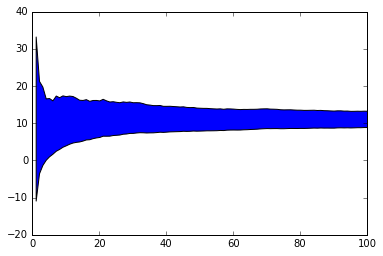

In [22]:
# Строим график интервала.
plt.figure()
plt.fill_between(np.linspace(1,N,N), interval[:,0], interval[:,1])
plt.show()

In [17]:
# Оценим вероятность попадания истинного значения theta в интервал по схеме Бернулли
for N in [10, 100]: # для двух размеров выборки
    for K in [100, 1000, 10000, 100000]: # попробуем разное число экспериментов
        # Генерируем K выборок размера N
        samples = np.array([gamma.rvs(theta, lam, size=N) for k in range(K)])
        intervals = np.array([
                [
                    np.mean(samples[k]) / lam - u * np.mean(samples[k]) / (lam * N) ** 0.5,
                    np.mean(samples[k]) / lam + u * np.mean(samples[k]) / (lam * N) ** 0.5 
                ] for k in range(K)])
        
        # Смотрим, сколько раз в интервалы попадает истинное значение theta.
        # Строим бернуллиевские выборки и оцениваем по ним вероятность попадания theta в интервал.
        bern = np.array([1 if intervals[k,0] <= theta <= intervals[k,1] else 0 for k in range(K)])
        print('Sample size: %3s.' % N, 'Number of experiments:', K)
        print(np.count_nonzero(bern) / len(bern))

Sample size:  10. Number of experiments: 100
1.0
Sample size:  10. Number of experiments: 1000
1.0
Sample size:  10. Number of experiments: 10000
1.0
Sample size:  10. Number of experiments: 100000
1.0
Sample size: 100. Number of experiments: 100
1.0
Sample size: 100. Number of experiments: 1000
1.0
Sample size: 100. Number of experiments: 10000
1.0
Sample size: 100. Number of experiments: 100000
1.0


### Вывод:

Указанный выше интервал является асимптотическим доверительным интервалом уровня $\alpha=0,95$ для параметра $\theta$. График показывает, что при увеличении размера выборки интервал стабилизируется, заключая в себя истинное значение параметра, то есть он действительно является асимптотическим ДИ. Оценка вероятности дает 1 на всех рассмотренных выборках. Это говорит о том, что интервал не является точным для $\alpha$. По графику видно также, что он довольно широкий. Хотелось бы иметь более информативный интервал. 